## CREDIT CARD DEPOSITS (Recruiting Task DataSet)
Please open the attached dataset. It is an anonymized sample of credit card deposit attempts over a 12-month period. It has been selected for analysis because it shows a longitudinally decreasing approval rate from 10/1/2020 to 9/26/2021.

PARAMETER DESCRIPTIONS

- Deposit attempts have a Appr? value of '1' or '0' signifying whether they have been approved or declined.
- CustomerID identifies the customer account attempting to deposit.
- Processing CO indicates the credit card processing company that is processing the transaction for the business.
- Issuing Bank indicates the bank that has issued the customer's credit card.
- Amount indicates the amount that the customer is attempting to deposit.
- Attempt Timestamp indicates the date and time of the deposit attempt.

QUESTIONS

1. What is the dataset's approval rate by quarter?
2. How many Processing COs failed to approve any deposit attempts in each of the four quarters?
3. Identify any factors likely to have played a causal role for the decline in approval rates seen in Q3 2021 vs Q4 2020? 

## imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('dark_background')

## load data from excel

In [3]:
cc_deposits = pd.read_excel('excel_files/Recruiting Task Dataset _ abridged version.xlsx')
columns = ['tx_approved?', 'customer_id', 'cc_processing_co', 'cc_bank', 'amount', 'datetime']
cc_deposits.columns = columns
cc_deposits = cc_deposits.set_index('datetime')
cc_deposits

,tx_approved?,customer_id,cc_processing_co,cc_bank,amount
datetime,,,,,
2021-09-26 23:56:00,1,154838,203,BANK1000,500.00
2021-09-26 23:53:00,1,154587,190,BANK1017,100.00
2021-09-26 23:46:00,0,143623,204,BANK1013,90.00
2021-09-26 23:38:00,1,154435,103,BANK1139,25.00
2021-09-26 23:29:00,0,155195,109,BANK1016,60.00
...,...,...,...,...,...
2020-10-01 00:45:00,1,106214,125,BANK1000,41.00
2020-10-01 00:36:00,1,101870,110,BANK1001,30.00
2020-10-01 00:27:00,1,101628,124,BANK1002,25.00


## 1. What is the dataset's approval rate by quarter?

,datetime,approved_tx,total_tx,failed_tx,approval_rate
0,2020Q4,20349,32372,12023,62.86
1,2021Q1,21366,34752,13386,61.48
2,2021Q2,17543,29075,11532,60.34
3,2021Q3,16621,27971,11350,59.42


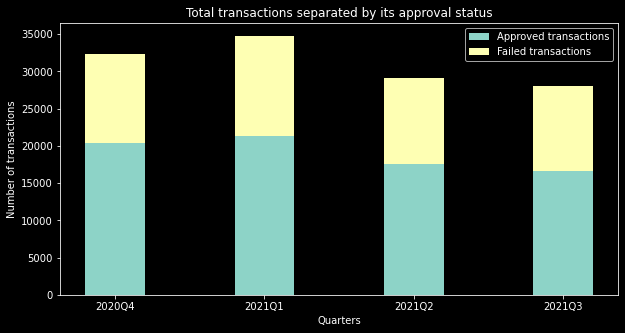

In [4]:
quarterly_approval_rate = cc_deposits.groupby(cc_deposits.index.to_period('Q'))['tx_approved?'].agg({'sum', 'count'})
quarterly_approval_rate['failed_tx'] = quarterly_approval_rate['count'] - quarterly_approval_rate['sum']
quarterly_approval_rate['approval_rate'] = (quarterly_approval_rate['sum'] / quarterly_approval_rate['count'] * 100).round(2)
quarterly_approval_rate = quarterly_approval_rate.reset_index().rename(columns={'count':'total_tx', 'sum':'approved_tx'})
quarterly_approval_rate['datetime'] = list(quarterly_approval_rate.datetime.astype(str))

display(quarterly_approval_rate)

fig, ax = plt.subplots(figsize = (10, 5))
x = list(quarterly_approval_rate.datetime.astype(str))
y1 = quarterly_approval_rate['approved_tx']
y2 = quarterly_approval_rate['failed_tx']
ax.bar(x, y1, width=0.4, align='center', label='Approved transactions')
ax.bar(x, y2, width=0.4, align='center', bottom=y1, label='Failed transactions')
ax.set_xlabel('Quarters')
ax.set_ylabel('Number of transactions')
ax.set_title('Total transactions separated by its approval status')
ax.legend()
plt.show()

## 2. How many Processing COs failed to approve any deposit attempts in each of the four quarters?

In [8]:
cc_processing_co_failure = cc_deposits.groupby([cc_deposits.index.to_period('Q'), 'cc_processing_co'])['tx_approved?'].value_counts().unstack().replace(np.nan, 0)
display(cc_processing_co_failure)
cc_processing_co_failure = cc_processing_co_failure.loc[cc_processing_co_failure[1] == 0].reset_index()
display(cc_processing_co_failure)
cc_processing_co_failure = cc_processing_co_failure.groupby('datetime')['cc_processing_co'].count().reset_index().rename(columns={'cc_processing_co':'cc_processing_co_failed_any'})
display(pd.DataFrame(cc_processing_co_failure))

tx_approved?                   0       1
datetime cc_processing_co               
2020Q4   100               626.0  2678.0
         101               142.0    96.0
         102               256.0   638.0
         103               562.0  1131.0
         104               101.0   126.0
...                          ...     ...
2021Q3   227                 2.0     0.0
         228                11.0     0.0
         230               156.0     0.0
         231                30.0     0.0
         232                13.0    11.0

[308 rows x 2 columns]

tx_approved?,datetime,cc_processing_co,0,1
0,2020Q4,142,5.0,0.0
1,2020Q4,143,648.0,0.0
2,2020Q4,144,116.0,0.0
3,2020Q4,145,127.0,0.0
4,2020Q4,146,12.0,0.0
5,2020Q4,148,2.0,0.0
6,2020Q4,178,4.0,0.0
7,2021Q1,143,634.0,0.0
8,2021Q1,144,261.0,0.0
9,2021Q1,145,145.0,0.0


,datetime,cc_processing_co_failed_any
0,2020Q4,7
1,2021Q1,7
2,2021Q2,6
3,2021Q3,7


## 3. Identify any factors likely to have played a causal role for the decline in approval rates seen in Q3 2021 vs Q4 2020?

### banks that fail the most

In [ ]:
cc_bank_failure_analysis = cc_deposits.groupby('cc_bank')['tx_approved?'].value_counts().unstack().replace(np.nan, 0)
cc_bank_failure_analysis['total_tx'] = cc_bank_failure_analysis[0] + cc_bank_failure_analysis[1]
cc_bank_failure_analysis['failure_rate'] = cc_bank_failure_analysis[0] / cc_bank_failure_analysis['total_tx'] * 100
cc_bank_failure_analysis = cc_bank_failure_analysis.sort_values(by=[0, 'failure_rate', 'total_tx'], ascending=False).reset_index().rename(columns={0:'n_failed_tx', 1:'n_approved_tx'})
cc_bank_failure_analysis.head(15)

### processing companies that fail the most

In [ ]:
cc_processing_co_failure_analysis = cc_deposits.groupby('cc_processing_co')['tx_approved?'].value_counts().unstack().replace(np.nan, 0)
cc_processing_co_failure_analysis['total_tx'] = cc_processing_co_failure_analysis[0] + cc_processing_co_failure_analysis[1]
cc_processing_co_failure_analysis['failure_rate'] = cc_processing_co_failure_analysis[0] / cc_processing_co_failure_analysis['total_tx'] * 100
cc_processing_co_failure_analysis = cc_processing_co_failure_analysis.sort_values(by=[0, 'failure_rate', 'total_tx'], ascending=False).reset_index().rename(columns={0:'n_failed_tx', 1:'n_approved_tx'})
cc_processing_co_failure_analysis.head(15)

## other calculations

In [ ]:
prueba = cc_deposits.groupby(['cc_bank', 'cc_processing_co'])['tx_approved?'].value_counts().unstack().replace(np.nan, 0)
prueba['total_tx'] = prueba[0] + prueba[1]
prueba['failure_rate'] = prueba[0] / prueba['total_tx'] * 100
prueba = prueba.sort_values(by=[0, 'failure_rate', 'total_tx'], ascending=False)
#prueba = cc_bank_failure_analysis.sort_values(by=[0], ascending=False)
#prueba = cc_bank_failure_analysis.sort_values(by=['failure_rate', 'total_tx'], ascending=False)
prueba.head(15)

In [ ]:
q4_2020_start_date = pd.Timestamp('2020-10-01')
q4_2020_end_date = pd.Timestamp('2020-12-31')
q4_2020_cc_deposits = cc_deposits.loc[(cc_deposits.index >= q4_2020_start_date) & (cc_deposits.index <= q4_2020_end_date)]

q3_2021_start_date = pd.Timestamp('2021-07-01')
q3_2021_end_date = pd.Timestamp('2021-09-30')
q3_2021_cc_deposits = cc_deposits.loc[(cc_deposits.index >= q3_2021_start_date) & (cc_deposits.index <= q3_2021_end_date)]

fig, ax = plt.subplots(figsize = (20, 15))
sns.scatterplot(data=q4_2020_cc_deposits, x='datetime', y='amount', hue='tx_approved?');

In [ ]:
quarterly_approval_failed_by_pco = cc_deposits.loc[cc_deposits['tx_approved?'] == 0]
quarterly_approval_failed_by_pco = pd.DataFrame(quarterly_approval_failed_by_pco.groupby(quarterly_approval_failed_by_pco.index.to_period('Q'))['cc_processing_co'].nunique())

quarterly_approval_total_by_pco = cc_deposits.groupby(cc_deposits.index.to_period('Q'))['cc_processing_co'].nunique()

quarterly_approval_failed_by_pco['unique_count_total_pco'] = quarterly_approval_total_by_pco
quarterly_approval_failed_by_pco['failed_rate_unique_pco'] = (quarterly_approval_failed_by_pco['cc_processing_co'] / quarterly_approval_failed_by_pco['unique_count_total_pco'] * 100).round(2)

quarterly_approval_failed_by_pco = quarterly_approval_failed_by_pco.reset_index().rename(columns={'cc_processing_co':'unique_count_failed_pco'})

quarterly_approval_failed_by_pco['unique_count_approved_pco'] = quarterly_approval_failed_by_pco['unique_count_total_pco'] - quarterly_approval_failed_by_pco['unique_count_failed_pco']
display(quarterly_approval_failed_by_pco)

fig, ax = plt.subplots(figsize = (10, 5))
x = list(quarterly_approval_failed_by_pco.datetime.astype(str))
y1 = quarterly_approval_failed_by_pco['unique_count_approved_pco']
y2 = quarterly_approval_failed_by_pco['unique_count_failed_pco']
ax.bar(x, y1, width=0.4, align='center', label='Processing COs that approved all transactions')
ax.bar(x, y2, width=0.4, align='center', bottom=y1, label='Processing COs that failed at least 1 transaction')
ax.set_xlabel('Quarters')
ax.set_ylabel('Number of unique Processing COs')
ax.set_title('Total number of unique Processing COs separated by its efficiency')
ax.legend()
plt.show()